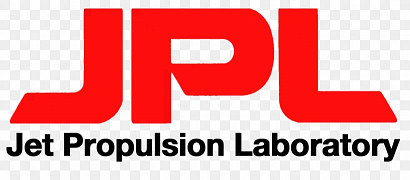
# Function: Ground Sample Distance

In [2]:
# %matplotlib inline
# %matplotlib widget
import math
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, Layout, widgets
import matplotlib.image as mpimg

def datafunc (Alt, p, EFL):
    
        img = mpimg.imread('sat.PNG')  #the satellite image

        #convert inputs to meters
        Alt = Alt * 1000 #Converts altitude to Kilometers
        p = p*1e-06 #Converts pixel size into meters

        #Constants
        pi = math.pi #Defines pi
        cv=180/pi  #conversion to degrees
        Re = 6.37e6 #Radius of Earth

        #Calculations
        theta = p/EFL #Defines theta in radions
        gsd = theta*Alt #Defines gsd
        thetaT = math.asin(Re/(Re + Alt)) #When off nadir angle reaches tangent
        
        #print results
        CalcResults = widgets.HTML(value = "<p style='font-size:16pt'><b>Calculated Results:</b>")
        display(CalcResults) #Displays calculated results message
        print ('Nadir gsd = %6.4f' %(gsd), 'M       iFOV = %6.4e' %(theta),'Radian     Critical Angle = %5.2f' %(thetaT*180/pi))
        #Ground Sample Distance Equals distance in radions multiplied by the altitude
        #flvw = Horz*Vert*gsd
        #print ('Full Field Of View',flvw,'M*2')
        #The Full Field Of View is the horizontal multiplied by the vertical and the Ground Sample Distance

        #Intial angle
        Angle = 30 #Makes intial angle start at 30 degrees
        y = [Alt,0] #First ordered pair for the line

        def plot_func(Angle):

            #Calculations for opposite sides of triangles
            ONAr=Angle/cv # Intial Angle in radians 
            O1 = Alt*math.tan(ONAr) #Opposite 1 is altitude multiplied by the tangent of the intial amgle
            O2 = Alt*math.tan(ONAr + theta) #Opposite 2 is the altitude multiplied by the tangent of the intial angle plus theta
            O3 = Alt*math.tan(thetaT) #This is the critical angle 
            H1= Alt/math.cos(ONAr) #The hypotenuse is the alititude multiplied by the cosine of the intial angle 
            ogsd = O2 - O1 #This is the difference between the bigger triangle side and the smaller one

            if (ONAr<= thetaT):#If the injtial angle is less than or equal to the critical
                thetab = pi/2 - math.asin(((Re+Alt)*math.sin(ONAr))/(Re)) #Formula from law of sines
                thetab2 = pi/2- math.asin(((Re+Alt)*math.sin(ONAr+theta))/(Re)) # Pi/2
                thetac = pi - thetab - ONAr #In the sum of all angles equaling 180, theta c is the missing angle
                thetac2 = pi - thetab2 - (ONAr + theta)
                arc1 = thetac * Re #This is the 
                arc2 = thetac2 * Re      
                arcln =arc2-arc1
                arclnr=format(arcln,'.4e') #formats print output

            #Formats numbers for display
            ogsdr=format(ogsd,'.4e')
            o1r=format(O1,'.4e')
            H1R=format(H1,'.4e')

            #Ordered pairs for graph lines
            x1 = [0, O1] 
            x2 = [0, 0.9*O2]  #Mult by 0.9 to see it, otherwise too close together on graph
            xc = [0, O3]   #critical angle dotted line
            xgsd =[O1,O2]

           #Sets up graph and labels
            fig, ax = plt.subplots(figsize=(12,5))
            plt.title('Off Nadir Ground Sample Distance Calculation')
            plt.ylabel('Altitude - M')
            plt.xlabel('Down Range Dist - M')
            plt.axis([0, Alt*2, 0, Alt])
            plt.plot (xc, y,':r',linewidth=3)


            ax.imshow(img, extent=[0, Alt*0.15, Alt, Alt*0.85]) # shows the image
            #ax.plot(x, x, '--', linewidth=5, color='firebrick'

            #Conditional statement for ONAr

            if (ONAr<= thetaT):
                #Prints result when ONAr does not exceed critical angle
                plt.plot (x1 , y,color = 'Blue')
                plt.plot (x2 , y, color = 'Green')
                plt.plot([O1,0.9*O2],[Alt*0.01,Alt*0.01], linewidth=5, color='purple')
                #plt.text(O1,0,'|',color='black')
                plt.text(Alt*1.2,Alt*.85,'         Slant Range = ' + str(H1R),color='blue')
                plt.text(Alt*1.2,Alt*.75,'              Flat GSD = ' + str(ogsdr),color='purple')
                plt.text(Alt*1.2,Alt*.65,'           Arc Lenght = ' + str(arclnr),color='purple')
                plt.text(Alt*1.2,Alt*.55,'   Down Rang Dist = ' + str(o1r),color='black')
            else: 
                #changes everything to red if critical angle is exceeded
                plt.plot (x1 , y,color = 'Red')
                plt.plot (x2 , y, color = 'Red') 
                plt.text(Alt,Alt*.85,'      Slant Range =  XXXXX' ,color='Red')
                plt.text(Alt,Alt*.75,'                   GSD = XXXXX',color='Red')
                plt.text(Alt,Alt*.65,'          Arc Lenght = XXXXX' ,color='Red')
                plt.text(Alt,Alt*.55,'Down Rang Dist = XXXXXX',color='Red')
                plt.text(Alt/10, Alt/5, "  Critical Angle Exceeded", color='Red')

            
        #The slider
        interact(plot_func, Angle = widgets.FloatSlider(value=30, min=0, max=90, step=1,layout=Layout(width="700px")))

    # Description width style
style1 = {'description_width': 'initial'} 
    
interact(datafunc,
             Alt = widgets.FloatText(value=894, step=1, description = 'Altitude (Km)',style=style1),
             p = widgets.FloatText(value=4, step=0.25, description = 'Pixel size (um)',style=style1),
             EFL = widgets.FloatText(value=1, step=0.05, description = 'Focal Lenght (m)',style=style1),
            )   
        


interactive(children=(FloatText(value=894.0, description='Altitude (Km)', step=1.0, style=DescriptionStyle(des…

<function __main__.datafunc(Alt, p, EFL)>

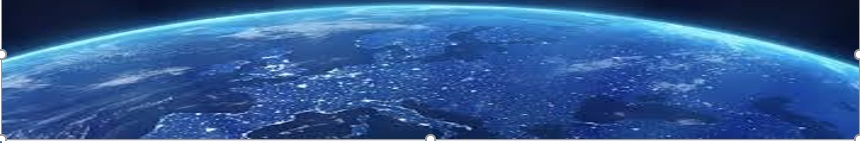
Code by: Ryan Devitt